## 🎯 **Project Goal**

> Visualize how different models (e.g., linear vs. high-degree polynomial) behave in terms of bias vs. variance, by showing:

- Training error vs. validation error

- Model predictions on synthetic data

- How overfitting and underfitting look in practice



## Imports

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression # toy dataset
from sklearn.model_selection import train_test_split


## Splitting the dataset into training and validation sets

In [9]:
X, y = make_regression(n_samples=200, n_features=2, noise=15, random_state=42) # X = features, y = target variable  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the linear models

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train_errors = []
val_errors = []


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error as rmse

for degree in range(1, 16):
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_val)

    mse_train = rmse(y_train, y_train_predict)
    train_errors.append(mse_train)
    
    mse_val = rmse(y_val, y_val_predict)
    val_errors.append(mse_val)


In [12]:
rmse_train = pd.Series(train_errors, index=range(1, 16), name="Train RMSE")
rmse_val = pd.Series(val_errors, index=range(1,16), name="Validation RMSE")

rmse_df = pd.concat([rmse_train, rmse_val], axis=1)
rmse_df.index.name = "Degree"

In [13]:
rmse_df

,Train RMSE,Validation RMSE
Degree,,
1,14.806886,1.512345e+01
2,14.703846,1.471287e+01
3,14.394343,1.575356e+01
4,14.240920,1.537985e+01
5,13.911741,2.682594e+01
6,13.392160,5.512407e+01
7,13.038704,3.873708e+01
8,12.104266,2.739909e+02
9,11.535045,5.076378e+03


## Let's have a look at how well the models fit the data

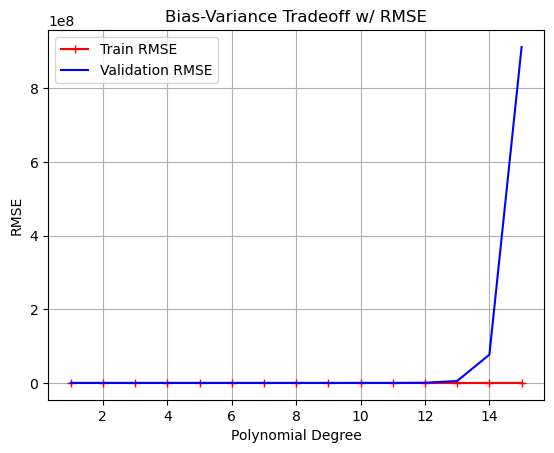

In [33]:
import matplotlib.pyplot as plt

plt.plot(range(1,16), train_errors, "r-+", label="Train RMSE")
plt.plot(range(1,16), val_errors, "b-", label="Validation RMSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()
plt.title("Bias-Variance Tradeoff w/ RMSE")
plt.grid(1)
plt.show()

### Using sq-rt of RMSE to get more insights about the trade-off

Text(0.5, 1.0, 'Bias-Variance Tradeoff w/ sqrt of RMSE')

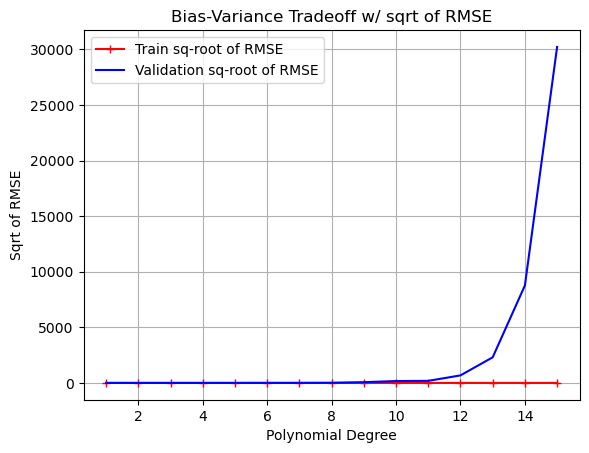

In [54]:
plt.clf()
plt.plot(range(1,16), np.sqrt(train_errors), "r-+", label="Train sq-root of RMSE")
plt.plot(range(1,16), np.sqrt(val_errors), "b-", label="Validation sq-root of RMSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Sqrt of RMSE") ## plt.ylabel("RMSE$^{1/2}$")
plt.legend(), plt.grid(1)
plt.title("Bias-Variance Tradeoff w/ sqrt of RMSE")

### Using 4th-root of RMSE to get more insights about the trade-off

Text(0.5, 1.0, 'Bias-Variance Tradeoff w/ 4th root of RMSE')

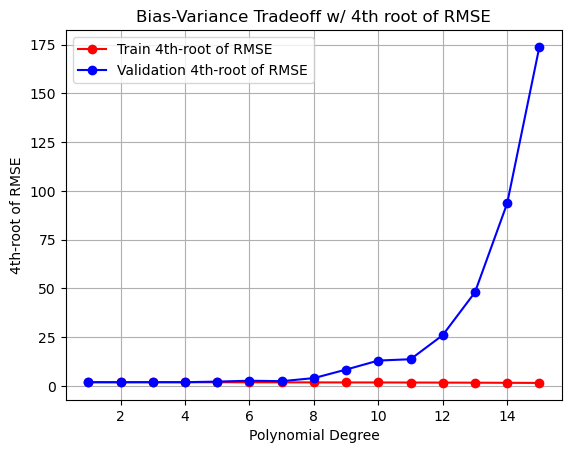

In [55]:
plt.clf()
plt.plot(range(1,16), np.sqrt(np.sqrt(train_errors)), "r-o", label="Train 4th-root of RMSE")
plt.plot(range(1,16), np.sqrt(np.sqrt(val_errors)), "b-o", label="Validation 4th-root of RMSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("4th-root of RMSE") ## plt.ylabel("RMSE$^{1/4}$")
plt.legend(), plt.grid(1)
plt.title("Bias-Variance Tradeoff w/ 4th root of RMSE")